Dataset Link:https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [04:20<00:00, 21.0MB/s]
100% 5.20G/5.20G [04:20<00:00, 21.4MB/s]


In [ ]:
import zipfile
a = zipfile.ZipFile('/content/skin-cancer-mnist-ham10000.zip','r')
a.extractall('/content/HAM10000')
a.close()

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [ ]:
meta=pd.read_csv("/content/HAM10000/HAM10000_metadata.csv")

In [ ]:
np.random.seed(101)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(meta['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
meta['label']=le.transform(meta["dx"])

In [ ]:
print(meta)


         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       label  
0          2  
1          2  
2          2  
3  

In [ ]:
print(meta['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [ ]:
image_path={os.path.splitext(os.path.basename(x))[0]:x
            for x in glob(os.path.join('/content/HAM10000/', '*' ,'*.jpg'))}

In [ ]:
print(image_path)

{'ISIC_0034255': '/content/HAM10000/HAM10000_images_part_2/ISIC_0034255.jpg', 'ISIC_0031400': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031400.jpg', 'ISIC_0031234': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031234.jpg', 'ISIC_0032166': '/content/HAM10000/HAM10000_images_part_2/ISIC_0032166.jpg', 'ISIC_0032121': '/content/HAM10000/HAM10000_images_part_2/ISIC_0032121.jpg', 'ISIC_0033536': '/content/HAM10000/HAM10000_images_part_2/ISIC_0033536.jpg', 'ISIC_0031761': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031761.jpg', 'ISIC_0032320': '/content/HAM10000/HAM10000_images_part_2/ISIC_0032320.jpg', 'ISIC_0031290': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031290.jpg', 'ISIC_0030736': '/content/HAM10000/HAM10000_images_part_2/ISIC_0030736.jpg', 'ISIC_0033573': '/content/HAM10000/HAM10000_images_part_2/ISIC_0033573.jpg', 'ISIC_0029798': '/content/HAM10000/HAM10000_images_part_2/ISIC_0029798.jpg', 'ISIC_0031511': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031511.jpg'

In [ ]:
meta['path']=meta['image_id'].map(image_path.get)

In [ ]:
print(meta)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       label                                               path

In [ ]:
from PIL import Image
meta['image']=meta['path'].map(lambda x:np.asarray(Image.open(x).resize((75,75))))

In [ ]:
print(meta)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       label                                               path

In [ ]:
import tensorflow as tf

x=np.asarray(meta['image'].tolist())
x=x/225
y=meta['label']
y_cat=tf.keras.utils.to_categorical(y,num_classes=7)

In [ ]:
random_seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.3,random_state=42)

BASIC CNN

In [ ]:
def build_cnn_model(input_shape = (75,75, 3), num_classes=2):
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(7, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 64)        0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/20
110/110 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.6626

110/110 [==============================] - 12s 35ms/step - loss: 0.2423 - accuracy: 0.6626 - val_loss: 0.2285 - val_accuracy: 0.6652 - lr: 0.0010
Epoch 2/20
108/110 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.6781

110/110 [==============================] - 3s 25ms/step - loss: 0.2127 - accuracy: 0.6777 - val_loss: 0.2282 - val_accuracy: 0.6859 - lr: 0.0010
Epoch 3/20
110/110 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.6969

110/110 [==============================] - 3s 25ms/step - loss: 0.1997 - accuracy: 0.6969 - val_loss: 0.2018 - val_accuracy: 0.6862 - lr: 0.0010
Epoch 4/20
109/110 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.7031

110/110 [==============================] - 3s 24ms/step - loss: 0.1904 - accuracy: 0.7036 - val_loss: 0.1956 - val_accuracy: 0.7062 - lr: 0.0010
Epoch 5/20
109/110 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.7188

110/110 [==============================] - 3s 24ms/step - loss: 0.1834 - accuracy: 0.7187 - val_loss: 0.1854 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 6/20
108/110 [============================>.] - ETA: 0s - loss: 0.1754 - accuracy: 0.7334

110/110 [==============================] - 3s 24ms/step - loss: 0.1759 - accuracy: 0.7325 - val_loss: 0.1856 - val_accuracy: 0.7314 - lr: 0.0010
Epoch 7/20
109/110 [============================>.] - ETA: 0s - loss: 0.1677 - accuracy: 0.7433

110/110 [==============================] - 3s 26ms/step - loss: 0.1677 - accuracy: 0.7437 - val_loss: 0.1848 - val_accuracy: 0.7225 - lr: 0.0010
Epoch 8/20
109/110 [============================>.] - ETA: 0s - loss: 0.1607 - accuracy: 0.7576

110/110 [==============================] - 3s 27ms/step - loss: 0.1605 - accuracy: 0.7581 - val_loss: 0.1765 - val_accuracy: 0.7331 - lr: 0.0010
Epoch 9/20
109/110 [============================>.] - ETA: 0s - loss: 0.1576 - accuracy: 0.7612

110/110 [==============================] - 3s 24ms/step - loss: 0.1576 - accuracy: 0.7612 - val_loss: 0.1768 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 10/20
109/110 [============================>.] - ETA: 0s - loss: 0.1510 - accuracy: 0.7724

110/110 [==============================] - 3s 24ms/step - loss: 0.1511 - accuracy: 0.7722 - val_loss: 0.1674 - val_accuracy: 0.7438 - lr: 0.0010
Epoch 11/20
110/110 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.7817

110/110 [==============================] - 3s 25ms/step - loss: 0.1431 - accuracy: 0.7817 - val_loss: 0.1765 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 12/20
109/110 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.7868

110/110 [==============================] - 3s 25ms/step - loss: 0.1399 - accuracy: 0.7866 - val_loss: 0.1660 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 13/20
109/110 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.8091

110/110 [==============================] - 3s 24ms/step - loss: 0.1305 - accuracy: 0.8091 - val_loss: 0.1692 - val_accuracy: 0.7451 - lr: 0.0010
Epoch 14/20
109/110 [============================>.] - ETA: 0s - loss: 0.1280 - accuracy: 0.8125

110/110 [==============================] - 3s 24ms/step - loss: 0.1279 - accuracy: 0.8127 - val_loss: 0.1753 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 15/20
109/110 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.8205

110/110 [==============================] - 3s 24ms/step - loss: 0.1218 - accuracy: 0.8198 - val_loss: 0.1694 - val_accuracy: 0.7424 - lr: 0.0010
Epoch 16/20
108/110 [============================>.] - ETA: 0s - loss: 0.1127 - accuracy: 0.8359

110/110 [==============================] - 3s 26ms/step - loss: 0.1127 - accuracy: 0.8359 - val_loss: 0.1745 - val_accuracy: 0.7474 - lr: 0.0010
Epoch 17/20
109/110 [============================>.] - ETA: 0s - loss: 0.1102 - accuracy: 0.8390

110/110 [==============================] - 3s 24ms/step - loss: 0.1101 - accuracy: 0.8392 - val_loss: 0.1776 - val_accuracy: 0.7424 - lr: 0.0010
Epoch 18/20
109/110 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.8470

110/110 [==============================] - 3s 28ms/step - loss: 0.1031 - accuracy: 0.8474 - val_loss: 0.1864 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 19/20
109/110 [============================>.] - ETA: 0s - loss: 0.0951 - accuracy: 0.8698

110/110 [==============================] - 3s 25ms/step - loss: 0.0951 - accuracy: 0.8696 - val_loss: 0.1960 - val_accuracy: 0.7494 - lr: 0.0010
Epoch 20/20
108/110 [============================>.] - ETA: 0s - loss: 0.0913 - accuracy: 0.8708

110/110 [==============================] - 3s 26ms/step - loss: 0.0911 - accuracy: 0.8716 - val_loss: 0.1941 - val_accuracy: 0.7511 - lr: 0.0010


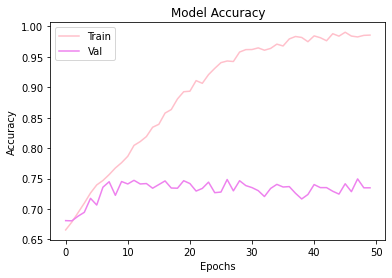

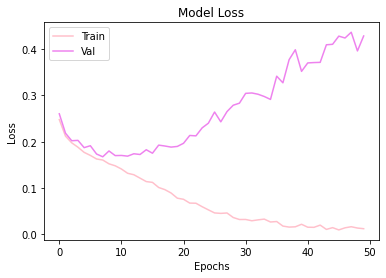

In [ ]:
plt.plot(history.history['accuracy'],color='pink')
plt.plot(history.history['val_accuracy'],color='violet')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left',)
plt.show()


plt.plot(history.history['loss'],color='pink')
plt.plot(history.history['val_loss'],color='violet')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 18, 18, 64)       

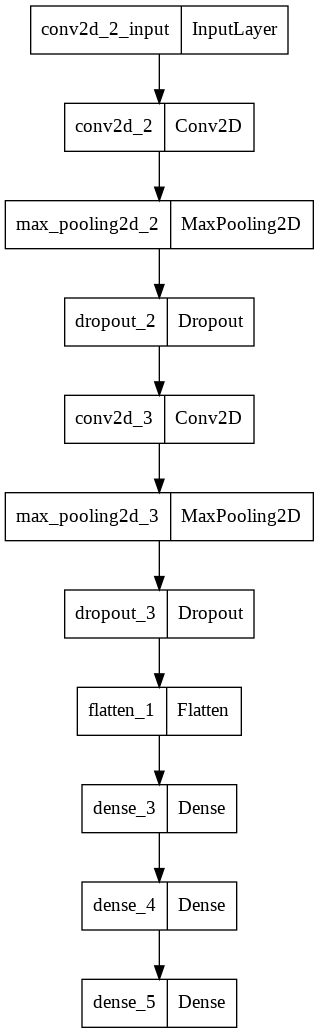

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

GOOGLE NET

In [ ]:
import keras
from keras.applications import InceptionV3 #GoogleNet

In [ ]:
model1=InceptionV3(input_shape=(75,75,3),weights="imagenet",include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
  model = Sequential() # layer has 1 i/p and 1 o/p
  model.add(model1)
  model.add(Flatten())
  model.add(keras.layers.Dense(128,activation="relu"))
  model.add(keras.layers.Dense(7,activation="sigmoid"))
  model.summary()
  optimizer= Adam(lr=0.001)

  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

  return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 22,065,959
Trainable params: 22,031,527
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.7097

110/110 [==============================] - 15s 73ms/step - loss: 0.2048 - accuracy: 0.7097 - val_loss: 0.5078 - val_accuracy: 0.5394 - lr: 0.0010
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.7519

110/110 [==============================] - 5s 49ms/step - loss: 0.1748 - accuracy: 0.7519 - val_loss: 0.3385 - val_accuracy: 0.6093 - lr: 0.0010
Epoch 3/50
109/110 [============================>.] - ETA: 0s - loss: 0.1497 - accuracy: 0.7861

110/110 [==============================] - 5s 49ms/step - loss: 0.1499 - accuracy: 0.7857 - val_loss: 0.2190 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 4/50
110/110 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.8058

110/110 [==============================] - 6s 55ms/step - loss: 0.1355 - accuracy: 0.8058 - val_loss: 0.2109 - val_accuracy: 0.6895 - lr: 0.0010
Epoch 5/50
110/110 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.8412

110/110 [==============================] - 5s 50ms/step - loss: 0.1193 - accuracy: 0.8412 - val_loss: 0.2280 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 6/50
110/110 [==============================] - ETA: 0s - loss: 0.1078 - accuracy: 0.8542

110/110 [==============================] - 5s 49ms/step - loss: 0.1078 - accuracy: 0.8542 - val_loss: 0.2453 - val_accuracy: 0.6799 - lr: 0.0010
Epoch 7/50
109/110 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.7956

110/110 [==============================] - 5s 49ms/step - loss: 0.1501 - accuracy: 0.7946 - val_loss: 4.7172 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 8/50
109/110 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.8085

110/110 [==============================] - 5s 49ms/step - loss: 0.1325 - accuracy: 0.8087 - val_loss: 0.2023 - val_accuracy: 0.7334 - lr: 0.0010
Epoch 9/50
109/110 [============================>.] - ETA: 0s - loss: 0.1059 - accuracy: 0.8525

110/110 [==============================] - 5s 49ms/step - loss: 0.1060 - accuracy: 0.8519 - val_loss: 0.1819 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 10/50
110/110 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.8823

110/110 [==============================] - 5s 49ms/step - loss: 0.0882 - accuracy: 0.8823 - val_loss: 0.2046 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 11/50
109/110 [============================>.] - ETA: 0s - loss: 0.0740 - accuracy: 0.8994

110/110 [==============================] - 5s 49ms/step - loss: 0.0740 - accuracy: 0.8996 - val_loss: 0.1687 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 12/50
109/110 [============================>.] - ETA: 0s - loss: 0.0613 - accuracy: 0.9183

110/110 [==============================] - 5s 49ms/step - loss: 0.0616 - accuracy: 0.9177 - val_loss: 0.2064 - val_accuracy: 0.7534 - lr: 0.0010
Epoch 13/50
109/110 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9266

110/110 [==============================] - 5s 49ms/step - loss: 0.0569 - accuracy: 0.9268 - val_loss: 0.2109 - val_accuracy: 0.7607 - lr: 0.0010
Epoch 14/50
109/110 [============================>.] - ETA: 0s - loss: 0.0437 - accuracy: 0.9424

110/110 [==============================] - 5s 48ms/step - loss: 0.0436 - accuracy: 0.9425 - val_loss: 0.2056 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 15/50
109/110 [============================>.] - ETA: 0s - loss: 0.0374 - accuracy: 0.9534

110/110 [==============================] - 5s 49ms/step - loss: 0.0374 - accuracy: 0.9534 - val_loss: 0.2155 - val_accuracy: 0.7627 - lr: 0.0010
Epoch 16/50
109/110 [============================>.] - ETA: 0s - loss: 0.0319 - accuracy: 0.9576

110/110 [==============================] - 5s 49ms/step - loss: 0.0320 - accuracy: 0.9573 - val_loss: 0.2814 - val_accuracy: 0.7331 - lr: 0.0010
Epoch 17/50
109/110 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9540

110/110 [==============================] - 5s 49ms/step - loss: 0.0363 - accuracy: 0.9539 - val_loss: 0.4554 - val_accuracy: 0.7195 - lr: 0.0010
Epoch 18/50
109/110 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9541

110/110 [==============================] - 5s 49ms/step - loss: 0.0362 - accuracy: 0.9542 - val_loss: 0.2778 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 19/50
110/110 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9551

110/110 [==============================] - 5s 49ms/step - loss: 0.0373 - accuracy: 0.9551 - val_loss: 0.2447 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 20/50
109/110 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9698

110/110 [==============================] - 5s 49ms/step - loss: 0.0271 - accuracy: 0.9698 - val_loss: 0.2308 - val_accuracy: 0.7597 - lr: 0.0010
Epoch 21/50
109/110 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9703

110/110 [==============================] - 5s 49ms/step - loss: 0.0239 - accuracy: 0.9702 - val_loss: 0.2914 - val_accuracy: 0.7627 - lr: 0.0010
Epoch 22/50
109/110 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9748

110/110 [==============================] - 5s 49ms/step - loss: 0.0204 - accuracy: 0.9749 - val_loss: 0.2645 - val_accuracy: 0.7597 - lr: 0.0010
Epoch 23/50
109/110 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9759

110/110 [==============================] - 5s 49ms/step - loss: 0.0195 - accuracy: 0.9760 - val_loss: 0.2874 - val_accuracy: 0.7637 - lr: 0.0010
Epoch 24/50
109/110 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9806

110/110 [==============================] - 5s 49ms/step - loss: 0.0163 - accuracy: 0.9807 - val_loss: 0.2871 - val_accuracy: 0.7631 - lr: 0.0010
Epoch 25/50
109/110 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9772

110/110 [==============================] - 5s 49ms/step - loss: 0.0183 - accuracy: 0.9772 - val_loss: 0.3138 - val_accuracy: 0.7567 - lr: 0.0010
Epoch 26/50
109/110 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9831

110/110 [==============================] - 5s 49ms/step - loss: 0.0145 - accuracy: 0.9830 - val_loss: 0.2886 - val_accuracy: 0.7627 - lr: 0.0010
Epoch 27/50
109/110 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9779

110/110 [==============================] - 5s 48ms/step - loss: 0.0170 - accuracy: 0.9777 - val_loss: 0.2934 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 28/50
110/110 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9797

110/110 [==============================] - 5s 49ms/step - loss: 0.0165 - accuracy: 0.9797 - val_loss: 0.3462 - val_accuracy: 0.7481 - lr: 0.0010
Epoch 29/50
109/110 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9795

110/110 [==============================] - 5s 49ms/step - loss: 0.0165 - accuracy: 0.9795 - val_loss: 0.3699 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 30/50
109/110 [============================>.] - ETA: 0s - loss: 0.0126 - accuracy: 0.9847

110/110 [==============================] - 5s 49ms/step - loss: 0.0125 - accuracy: 0.9847 - val_loss: 0.2985 - val_accuracy: 0.7597 - lr: 0.0010
Epoch 31/50
109/110 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9809

110/110 [==============================] - 5s 49ms/step - loss: 0.0159 - accuracy: 0.9807 - val_loss: 0.3050 - val_accuracy: 0.7691 - lr: 0.0010
Epoch 32/50
109/110 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9887

110/110 [==============================] - 5s 49ms/step - loss: 0.0096 - accuracy: 0.9887 - val_loss: 0.3030 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 33/50
110/110 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9933

110/110 [==============================] - 5s 49ms/step - loss: 0.0068 - accuracy: 0.9933 - val_loss: 0.3972 - val_accuracy: 0.7434 - lr: 0.0010
Epoch 34/50
109/110 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9713

110/110 [==============================] - 5s 49ms/step - loss: 0.0230 - accuracy: 0.9710 - val_loss: 0.4124 - val_accuracy: 0.6686 - lr: 0.0010
Epoch 35/50
109/110 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9844

110/110 [==============================] - 5s 49ms/step - loss: 0.0146 - accuracy: 0.9845 - val_loss: 0.4123 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 36/50
109/110 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9881

110/110 [==============================] - 5s 49ms/step - loss: 0.0110 - accuracy: 0.9880 - val_loss: 0.3311 - val_accuracy: 0.7631 - lr: 0.0010
Epoch 37/50
109/110 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9908

110/110 [==============================] - 5s 49ms/step - loss: 0.0082 - accuracy: 0.9909 - val_loss: 0.3932 - val_accuracy: 0.7028 - lr: 0.0010
Epoch 38/50
110/110 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9578

110/110 [==============================] - 5s 49ms/step - loss: 0.0377 - accuracy: 0.9578 - val_loss: 50.7891 - val_accuracy: 0.5983 - lr: 0.0010
Epoch 39/50
110/110 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9465

110/110 [==============================] - 5s 49ms/step - loss: 0.0421 - accuracy: 0.9465 - val_loss: 0.4654 - val_accuracy: 0.7454 - lr: 0.0010
Epoch 40/50
109/110 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9808

110/110 [==============================] - 5s 49ms/step - loss: 0.0163 - accuracy: 0.9807 - val_loss: 0.3634 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 41/50
109/110 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9901

110/110 [==============================] - 5s 49ms/step - loss: 0.0088 - accuracy: 0.9896 - val_loss: 0.3694 - val_accuracy: 0.7527 - lr: 0.0010
Epoch 42/50
109/110 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9872

110/110 [==============================] - 5s 49ms/step - loss: 0.0115 - accuracy: 0.9873 - val_loss: 0.2878 - val_accuracy: 0.7820 - lr: 0.0010
Epoch 43/50
109/110 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9854

110/110 [==============================] - 5s 49ms/step - loss: 0.0133 - accuracy: 0.9853 - val_loss: 0.3241 - val_accuracy: 0.7717 - lr: 0.0010
Epoch 44/50
109/110 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9907

110/110 [==============================] - 5s 49ms/step - loss: 0.0082 - accuracy: 0.9907 - val_loss: 0.2947 - val_accuracy: 0.7797 - lr: 0.0010
Epoch 45/50
110/110 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9756

110/110 [==============================] - 5s 49ms/step - loss: 0.0216 - accuracy: 0.9756 - val_loss: 5.2362 - val_accuracy: 0.7058 - lr: 0.0010
Epoch 46/50
109/110 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9814

110/110 [==============================] - 5s 49ms/step - loss: 0.0171 - accuracy: 0.9815 - val_loss: 0.4977 - val_accuracy: 0.7657 - lr: 0.0010
Epoch 47/50
109/110 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9923

110/110 [==============================] - 5s 49ms/step - loss: 0.0076 - accuracy: 0.9922 - val_loss: 0.2910 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 48/50
109/110 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9897

110/110 [==============================] - 5s 49ms/step - loss: 0.0086 - accuracy: 0.9897 - val_loss: 0.3373 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 49/50
109/110 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9933

110/110 [==============================] - 5s 49ms/step - loss: 0.0061 - accuracy: 0.9932 - val_loss: 0.4945 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 50/50
109/110 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9885

110/110 [==============================] - 5s 49ms/step - loss: 0.0102 - accuracy: 0.9886 - val_loss: 0.3468 - val_accuracy: 0.7807 - lr: 0.0010


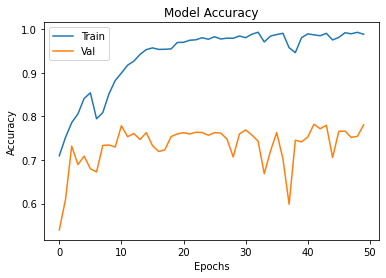

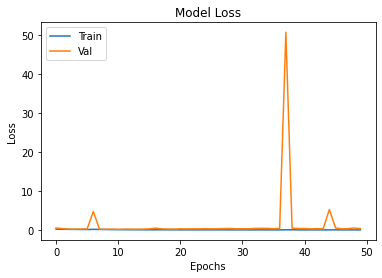

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 22,065,959
Trainable params: 22,031,527
Non-trainable params: 34,432
_________________________________________________________________


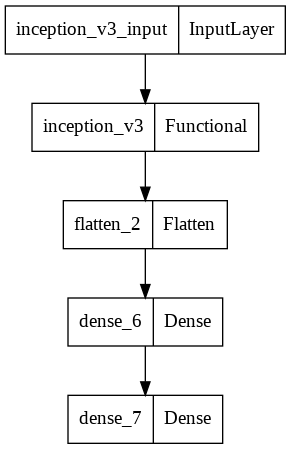

In [ ]:

import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
model3=VGG16(input_shape=(75,75,3),weights="imagenet",include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75,75, 3), num_classes=2):
    model = Sequential()
    model.add(model3)

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(7, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               262272    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 7)                 903       
                                                                 
Total params: 14,994,375
Trainable params: 14,994,375
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.3453 - accuracy: 0.6716

110/110 [==============================] - 5s 33ms/step - loss: 0.3453 - accuracy: 0.6716 - val_loss: 0.2834 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 2/50
109/110 [============================>.] - ETA: 0s - loss: 0.2337 - accuracy: 0.6687

110/110 [==============================] - 3s 23ms/step - loss: 0.2334 - accuracy: 0.6693 - val_loss: 0.2178 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 3/50
109/110 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.6783

110/110 [==============================] - 3s 23ms/step - loss: 0.2139 - accuracy: 0.6785 - val_loss: 0.2040 - val_accuracy: 0.6869 - lr: 0.0010
Epoch 4/50
109/110 [============================>.] - ETA: 0s - loss: 0.2027 - accuracy: 0.6897

110/110 [==============================] - 3s 23ms/step - loss: 0.2025 - accuracy: 0.6897 - val_loss: 0.1964 - val_accuracy: 0.6905 - lr: 0.0010
Epoch 5/50
109/110 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.6957

110/110 [==============================] - 3s 23ms/step - loss: 0.1980 - accuracy: 0.6960 - val_loss: 0.2058 - val_accuracy: 0.6955 - lr: 0.0010
Epoch 6/50
109/110 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.6944

110/110 [==============================] - 3s 23ms/step - loss: 0.1953 - accuracy: 0.6946 - val_loss: 0.2080 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 7/50
109/110 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.6981

110/110 [==============================] - 3s 23ms/step - loss: 0.1920 - accuracy: 0.6980 - val_loss: 0.1921 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 8/50
109/110 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.6967

110/110 [==============================] - 3s 23ms/step - loss: 0.1889 - accuracy: 0.6959 - val_loss: 0.1908 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 9/50
109/110 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.7026

110/110 [==============================] - 3s 23ms/step - loss: 0.1869 - accuracy: 0.7031 - val_loss: 0.1837 - val_accuracy: 0.7002 - lr: 0.0010
Epoch 10/50
109/110 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.7083

110/110 [==============================] - 3s 23ms/step - loss: 0.1871 - accuracy: 0.7083 - val_loss: 0.1977 - val_accuracy: 0.6948 - lr: 0.0010
Epoch 11/50
109/110 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.7004

110/110 [==============================] - 3s 23ms/step - loss: 0.1847 - accuracy: 0.6994 - val_loss: 0.1786 - val_accuracy: 0.7098 - lr: 0.0010
Epoch 12/50
109/110 [============================>.] - ETA: 0s - loss: 0.1765 - accuracy: 0.7165

110/110 [==============================] - 3s 23ms/step - loss: 0.1764 - accuracy: 0.7165 - val_loss: 0.1812 - val_accuracy: 0.7171 - lr: 0.0010
Epoch 13/50
109/110 [============================>.] - ETA: 0s - loss: 0.1721 - accuracy: 0.7238

110/110 [==============================] - 3s 23ms/step - loss: 0.1722 - accuracy: 0.7235 - val_loss: 0.1874 - val_accuracy: 0.7121 - lr: 0.0010
Epoch 14/50
109/110 [============================>.] - ETA: 0s - loss: 0.1710 - accuracy: 0.7312

110/110 [==============================] - 3s 23ms/step - loss: 0.1710 - accuracy: 0.7314 - val_loss: 0.1807 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 15/50
109/110 [============================>.] - ETA: 0s - loss: 0.1679 - accuracy: 0.7375

110/110 [==============================] - 3s 23ms/step - loss: 0.1676 - accuracy: 0.7379 - val_loss: 0.1932 - val_accuracy: 0.7155 - lr: 0.0010
Epoch 16/50
109/110 [============================>.] - ETA: 0s - loss: 0.1638 - accuracy: 0.7453

110/110 [==============================] - 3s 23ms/step - loss: 0.1639 - accuracy: 0.7454 - val_loss: 0.1852 - val_accuracy: 0.7062 - lr: 0.0010
Epoch 17/50
109/110 [============================>.] - ETA: 0s - loss: 0.1600 - accuracy: 0.7553

110/110 [==============================] - 3s 23ms/step - loss: 0.1601 - accuracy: 0.7553 - val_loss: 0.1843 - val_accuracy: 0.7048 - lr: 0.0010
Epoch 18/50
109/110 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.7511

110/110 [==============================] - 3s 23ms/step - loss: 0.1614 - accuracy: 0.7511 - val_loss: 0.1692 - val_accuracy: 0.7334 - lr: 0.0010
Epoch 19/50
109/110 [============================>.] - ETA: 0s - loss: 0.1552 - accuracy: 0.7630

110/110 [==============================] - 3s 23ms/step - loss: 0.1550 - accuracy: 0.7636 - val_loss: 0.1763 - val_accuracy: 0.7301 - lr: 0.0010
Epoch 20/50
109/110 [============================>.] - ETA: 0s - loss: 0.1513 - accuracy: 0.7666

110/110 [==============================] - 3s 23ms/step - loss: 0.1511 - accuracy: 0.7668 - val_loss: 0.2024 - val_accuracy: 0.7118 - lr: 0.0010
Epoch 21/50
109/110 [============================>.] - ETA: 0s - loss: 0.1440 - accuracy: 0.7791

110/110 [==============================] - 3s 23ms/step - loss: 0.1441 - accuracy: 0.7787 - val_loss: 0.1894 - val_accuracy: 0.7331 - lr: 0.0010
Epoch 22/50
109/110 [============================>.] - ETA: 0s - loss: 0.1445 - accuracy: 0.7878

110/110 [==============================] - 3s 23ms/step - loss: 0.1447 - accuracy: 0.7876 - val_loss: 0.1826 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 23/50
109/110 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.7903

110/110 [==============================] - 3s 23ms/step - loss: 0.1379 - accuracy: 0.7907 - val_loss: 0.1776 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 24/50
109/110 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.8005

110/110 [==============================] - 3s 23ms/step - loss: 0.1342 - accuracy: 0.8000 - val_loss: 0.1737 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 25/50
109/110 [============================>.] - ETA: 0s - loss: 0.1267 - accuracy: 0.8122

110/110 [==============================] - 3s 23ms/step - loss: 0.1265 - accuracy: 0.8126 - val_loss: 0.1737 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 26/50
109/110 [============================>.] - ETA: 0s - loss: 0.1250 - accuracy: 0.8132

110/110 [==============================] - 3s 23ms/step - loss: 0.1248 - accuracy: 0.8137 - val_loss: 0.1856 - val_accuracy: 0.7148 - lr: 0.0010
Epoch 27/50
109/110 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.8194

110/110 [==============================] - 3s 23ms/step - loss: 0.1223 - accuracy: 0.8194 - val_loss: 0.1806 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 28/50
109/110 [============================>.] - ETA: 0s - loss: 0.1119 - accuracy: 0.8384

110/110 [==============================] - 3s 23ms/step - loss: 0.1122 - accuracy: 0.8381 - val_loss: 0.1827 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 29/50
109/110 [============================>.] - ETA: 0s - loss: 0.1101 - accuracy: 0.8439

110/110 [==============================] - 3s 23ms/step - loss: 0.1101 - accuracy: 0.8437 - val_loss: 0.1867 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 30/50
109/110 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.8554

110/110 [==============================] - 3s 23ms/step - loss: 0.1030 - accuracy: 0.8555 - val_loss: 0.1995 - val_accuracy: 0.7101 - lr: 0.0010
Epoch 31/50
109/110 [============================>.] - ETA: 0s - loss: 0.1083 - accuracy: 0.8426

110/110 [==============================] - 3s 23ms/step - loss: 0.1083 - accuracy: 0.8427 - val_loss: 0.1928 - val_accuracy: 0.7378 - lr: 0.0010
Epoch 32/50
109/110 [============================>.] - ETA: 0s - loss: 0.0983 - accuracy: 0.8640

110/110 [==============================] - 3s 23ms/step - loss: 0.0981 - accuracy: 0.8643 - val_loss: 0.2306 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 33/50
109/110 [============================>.] - ETA: 0s - loss: 0.0936 - accuracy: 0.8693

110/110 [==============================] - 3s 23ms/step - loss: 0.0936 - accuracy: 0.8692 - val_loss: 0.2083 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 34/50
109/110 [============================>.] - ETA: 0s - loss: 0.0986 - accuracy: 0.8591

110/110 [==============================] - 3s 23ms/step - loss: 0.0986 - accuracy: 0.8591 - val_loss: 0.2016 - val_accuracy: 0.7388 - lr: 0.0010
Epoch 35/50
109/110 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.8918

110/110 [==============================] - 3s 23ms/step - loss: 0.0783 - accuracy: 0.8919 - val_loss: 0.2269 - val_accuracy: 0.7092 - lr: 0.0010
Epoch 36/50
109/110 [============================>.] - ETA: 0s - loss: 0.0742 - accuracy: 0.9022

110/110 [==============================] - 3s 23ms/step - loss: 0.0744 - accuracy: 0.9019 - val_loss: 0.2083 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 37/50
109/110 [============================>.] - ETA: 0s - loss: 0.0662 - accuracy: 0.9114

110/110 [==============================] - 3s 23ms/step - loss: 0.0664 - accuracy: 0.9113 - val_loss: 0.2367 - val_accuracy: 0.7218 - lr: 0.0010
Epoch 38/50
109/110 [============================>.] - ETA: 0s - loss: 0.0702 - accuracy: 0.9064

110/110 [==============================] - 3s 23ms/step - loss: 0.0705 - accuracy: 0.9058 - val_loss: 0.2356 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 39/50
109/110 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9140

110/110 [==============================] - 3s 23ms/step - loss: 0.0635 - accuracy: 0.9141 - val_loss: 0.2322 - val_accuracy: 0.7211 - lr: 0.0010
Epoch 40/50
109/110 [============================>.] - ETA: 0s - loss: 0.0578 - accuracy: 0.9242

110/110 [==============================] - 3s 23ms/step - loss: 0.0576 - accuracy: 0.9245 - val_loss: 0.2790 - val_accuracy: 0.7328 - lr: 0.0010
Epoch 41/50
109/110 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9253

110/110 [==============================] - 3s 23ms/step - loss: 0.0553 - accuracy: 0.9255 - val_loss: 0.2497 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 42/50
109/110 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.9441

110/110 [==============================] - 3s 23ms/step - loss: 0.0435 - accuracy: 0.9444 - val_loss: 0.2823 - val_accuracy: 0.7131 - lr: 0.0010
Epoch 43/50
109/110 [============================>.] - ETA: 0s - loss: 0.0556 - accuracy: 0.9283

110/110 [==============================] - 3s 23ms/step - loss: 0.0555 - accuracy: 0.9284 - val_loss: 0.2600 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 44/50
109/110 [============================>.] - ETA: 0s - loss: 0.0386 - accuracy: 0.9515

110/110 [==============================] - 3s 23ms/step - loss: 0.0385 - accuracy: 0.9516 - val_loss: 0.3117 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 45/50
109/110 [============================>.] - ETA: 0s - loss: 0.0336 - accuracy: 0.9590

110/110 [==============================] - 3s 23ms/step - loss: 0.0336 - accuracy: 0.9591 - val_loss: 0.3078 - val_accuracy: 0.7281 - lr: 0.0010
Epoch 46/50
109/110 [============================>.] - ETA: 0s - loss: 0.0502 - accuracy: 0.9351

110/110 [==============================] - 3s 23ms/step - loss: 0.0503 - accuracy: 0.9351 - val_loss: 0.2876 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 47/50
109/110 [============================>.] - ETA: 0s - loss: 0.0365 - accuracy: 0.9533

110/110 [==============================] - 3s 23ms/step - loss: 0.0366 - accuracy: 0.9531 - val_loss: 0.2801 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 48/50
109/110 [============================>.] - ETA: 0s - loss: 0.0328 - accuracy: 0.9597

110/110 [==============================] - 3s 23ms/step - loss: 0.0329 - accuracy: 0.9596 - val_loss: 0.3302 - val_accuracy: 0.7131 - lr: 0.0010
Epoch 49/50
109/110 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9612

110/110 [==============================] - 3s 23ms/step - loss: 0.0327 - accuracy: 0.9609 - val_loss: 0.2944 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 50/50
109/110 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9670

110/110 [==============================] - 3s 23ms/step - loss: 0.0262 - accuracy: 0.9669 - val_loss: 0.3291 - val_accuracy: 0.7181 - lr: 0.0010


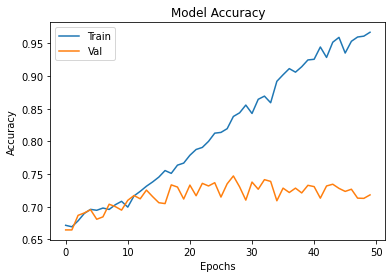

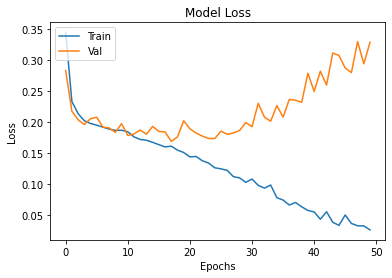

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               262272    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 7)                 903       
                                                                 
Total params: 14,994,375
Trainable params: 14,994,375
Non-trainable params: 0
_________________________________________________________________


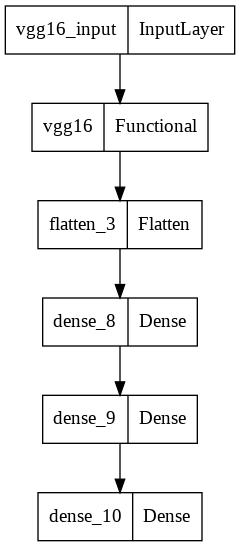

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

# RESNET

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model2=ResNet50(input_shape=(75,75,3),weights="imagenet",include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75,75, 3), num_classes=2):
  model = Sequential() # layer has 1 i/p and 1 o/p
  model.add(model2)
  model.add(Flatten())
  model.add(keras.layers.Dense(128,activation="relu"))
  model.add(keras.layers.Dense(7,activation="sigmoid"))
  model.summary()
  optimizer= Adam(lr=0.001)

  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

  return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_11 (Dense)            (None, 128)               2359424   
                                                                 
 dense_12 (Dense)            (None, 7)                 903       
                                                                 
Total params: 25,948,039
Trainable params: 25,894,919
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.7097

110/110 [==============================] - 12s 52ms/step - loss: 0.2326 - accuracy: 0.7097 - val_loss: 3528871.0000 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 2/50
109/110 [============================>.] - ETA: 0s - loss: 0.2869 - accuracy: 0.7434

110/110 [==============================] - 4s 37ms/step - loss: 0.2862 - accuracy: 0.7437 - val_loss: 0.2814 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 3/50
109/110 [============================>.] - ETA: 0s - loss: 0.1877 - accuracy: 0.7543

110/110 [==============================] - 4s 37ms/step - loss: 0.1875 - accuracy: 0.7544 - val_loss: 0.3331 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 4/50
109/110 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.7623

110/110 [==============================] - 4s 37ms/step - loss: 0.1640 - accuracy: 0.7625 - val_loss: 0.2714 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 5/50
109/110 [============================>.] - ETA: 0s - loss: 0.1454 - accuracy: 0.7781

110/110 [==============================] - 4s 36ms/step - loss: 0.1450 - accuracy: 0.7789 - val_loss: 0.2821 - val_accuracy: 0.6639 - lr: 0.0010
Epoch 6/50
109/110 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.8002

110/110 [==============================] - 4s 37ms/step - loss: 0.1363 - accuracy: 0.8003 - val_loss: 0.2908 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 7/50
109/110 [============================>.] - ETA: 0s - loss: 0.1214 - accuracy: 0.8235

110/110 [==============================] - 4s 37ms/step - loss: 0.1216 - accuracy: 0.8233 - val_loss: 0.3125 - val_accuracy: 0.4473 - lr: 0.0010
Epoch 8/50
109/110 [============================>.] - ETA: 0s - loss: 0.1160 - accuracy: 0.8356

110/110 [==============================] - 4s 37ms/step - loss: 0.1159 - accuracy: 0.8355 - val_loss: 0.2579 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 9/50
109/110 [============================>.] - ETA: 0s - loss: 0.0976 - accuracy: 0.8637

110/110 [==============================] - 4s 37ms/step - loss: 0.0975 - accuracy: 0.8635 - val_loss: 0.2585 - val_accuracy: 0.5877 - lr: 0.0010
Epoch 10/50
109/110 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.8872

110/110 [==============================] - 4s 37ms/step - loss: 0.0813 - accuracy: 0.8870 - val_loss: 0.2649 - val_accuracy: 0.6040 - lr: 0.0010
Epoch 11/50
109/110 [============================>.] - ETA: 0s - loss: 0.0766 - accuracy: 0.8971

110/110 [==============================] - 4s 37ms/step - loss: 0.0766 - accuracy: 0.8971 - val_loss: 0.2017 - val_accuracy: 0.7175 - lr: 0.0010
Epoch 12/50
109/110 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9154

110/110 [==============================] - 4s 37ms/step - loss: 0.0621 - accuracy: 0.9154 - val_loss: 0.2289 - val_accuracy: 0.7478 - lr: 0.0010
Epoch 13/50
109/110 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9352

110/110 [==============================] - 4s 37ms/step - loss: 0.0492 - accuracy: 0.9351 - val_loss: 0.2546 - val_accuracy: 0.7448 - lr: 0.0010
Epoch 14/50
109/110 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9498

110/110 [==============================] - 4s 37ms/step - loss: 0.0389 - accuracy: 0.9496 - val_loss: 0.2402 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 15/50
109/110 [============================>.] - ETA: 0s - loss: 0.0383 - accuracy: 0.9490

110/110 [==============================] - 4s 37ms/step - loss: 0.0382 - accuracy: 0.9491 - val_loss: 0.2548 - val_accuracy: 0.7607 - lr: 0.0010
Epoch 16/50
109/110 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9543

110/110 [==============================] - 4s 37ms/step - loss: 0.0351 - accuracy: 0.9545 - val_loss: 0.2243 - val_accuracy: 0.7521 - lr: 0.0010
Epoch 17/50
109/110 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9657

110/110 [==============================] - 4s 37ms/step - loss: 0.0260 - accuracy: 0.9659 - val_loss: 0.2668 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 18/50
109/110 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9677

110/110 [==============================] - 4s 37ms/step - loss: 0.0272 - accuracy: 0.9676 - val_loss: 0.2667 - val_accuracy: 0.7431 - lr: 0.0010
Epoch 19/50
109/110 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9735

110/110 [==============================] - 4s 37ms/step - loss: 0.0197 - accuracy: 0.9733 - val_loss: 0.3046 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 20/50
109/110 [============================>.] - ETA: 0s - loss: 0.0245 - accuracy: 0.9698

110/110 [==============================] - 4s 36ms/step - loss: 0.0244 - accuracy: 0.9699 - val_loss: 0.2791 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 21/50
109/110 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9867

110/110 [==============================] - 4s 37ms/step - loss: 0.0114 - accuracy: 0.9867 - val_loss: 0.3490 - val_accuracy: 0.7035 - lr: 0.0010
Epoch 22/50
109/110 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9709

110/110 [==============================] - 4s 37ms/step - loss: 0.0238 - accuracy: 0.9710 - val_loss: 0.3779 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 23/50
109/110 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9812

110/110 [==============================] - 4s 37ms/step - loss: 0.0159 - accuracy: 0.9813 - val_loss: 0.3287 - val_accuracy: 0.6982 - lr: 0.0010
Epoch 24/50
109/110 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9742

110/110 [==============================] - 4s 36ms/step - loss: 0.0204 - accuracy: 0.9739 - val_loss: 0.2706 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 25/50
109/110 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9743

110/110 [==============================] - 4s 37ms/step - loss: 0.0213 - accuracy: 0.9745 - val_loss: 0.4815 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 26/50
109/110 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9766

110/110 [==============================] - 4s 37ms/step - loss: 0.0202 - accuracy: 0.9765 - val_loss: 0.5047 - val_accuracy: 0.7411 - lr: 0.0010
Epoch 27/50
109/110 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9794

110/110 [==============================] - 4s 37ms/step - loss: 0.0173 - accuracy: 0.9793 - val_loss: 0.3423 - val_accuracy: 0.7401 - lr: 0.0010
Epoch 28/50
109/110 [============================>.] - ETA: 0s - loss: 0.0126 - accuracy: 0.9852

110/110 [==============================] - 4s 37ms/step - loss: 0.0126 - accuracy: 0.9853 - val_loss: 0.4359 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 29/50
109/110 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9880

110/110 [==============================] - 4s 37ms/step - loss: 0.0095 - accuracy: 0.9880 - val_loss: 0.3498 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 30/50
109/110 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9860

110/110 [==============================] - 4s 37ms/step - loss: 0.0121 - accuracy: 0.9857 - val_loss: 0.4022 - val_accuracy: 0.7498 - lr: 0.0010
Epoch 31/50
109/110 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9831

110/110 [==============================] - 4s 37ms/step - loss: 0.0154 - accuracy: 0.9832 - val_loss: 0.3620 - val_accuracy: 0.7524 - lr: 0.0010
Epoch 32/50
109/110 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9865

110/110 [==============================] - 4s 37ms/step - loss: 0.0103 - accuracy: 0.9866 - val_loss: 0.5412 - val_accuracy: 0.6476 - lr: 0.0010
Epoch 33/50
109/110 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9882

110/110 [==============================] - 4s 37ms/step - loss: 0.0117 - accuracy: 0.9882 - val_loss: 0.3557 - val_accuracy: 0.7181 - lr: 0.0010
Epoch 34/50
109/110 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9865

110/110 [==============================] - 4s 37ms/step - loss: 0.0124 - accuracy: 0.9863 - val_loss: 0.5905 - val_accuracy: 0.6672 - lr: 0.0010
Epoch 35/50
109/110 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 0.9835

110/110 [==============================] - 4s 36ms/step - loss: 0.0146 - accuracy: 0.9836 - val_loss: 0.3194 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 36/50
109/110 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9923

110/110 [==============================] - 4s 37ms/step - loss: 0.0074 - accuracy: 0.9922 - val_loss: 0.3129 - val_accuracy: 0.7621 - lr: 0.0010
Epoch 37/50
109/110 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9928

110/110 [==============================] - 4s 37ms/step - loss: 0.0061 - accuracy: 0.9929 - val_loss: 2.6775 - val_accuracy: 0.7155 - lr: 0.0010
Epoch 38/50
109/110 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9815

110/110 [==============================] - 4s 37ms/step - loss: 0.0142 - accuracy: 0.9816 - val_loss: 0.3045 - val_accuracy: 0.7195 - lr: 0.0010
Epoch 39/50
109/110 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9857

110/110 [==============================] - 4s 37ms/step - loss: 0.0117 - accuracy: 0.9856 - val_loss: 0.3452 - val_accuracy: 0.7438 - lr: 0.0010
Epoch 40/50
109/110 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9904

110/110 [==============================] - 4s 37ms/step - loss: 0.0086 - accuracy: 0.9904 - val_loss: 0.3753 - val_accuracy: 0.7674 - lr: 0.0010
Epoch 41/50
109/110 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9895

110/110 [==============================] - 4s 37ms/step - loss: 0.0094 - accuracy: 0.9896 - val_loss: 0.3653 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 42/50
109/110 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9875

110/110 [==============================] - 4s 37ms/step - loss: 0.0100 - accuracy: 0.9876 - val_loss: 0.4920 - val_accuracy: 0.7408 - lr: 0.0010
Epoch 43/50
109/110 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9865

110/110 [==============================] - 4s 36ms/step - loss: 0.0112 - accuracy: 0.9866 - val_loss: 0.3426 - val_accuracy: 0.7185 - lr: 0.0010
Epoch 44/50
109/110 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9827

110/110 [==============================] - 4s 37ms/step - loss: 0.0151 - accuracy: 0.9827 - val_loss: 0.2880 - val_accuracy: 0.7507 - lr: 0.0010
Epoch 45/50
109/110 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9915

110/110 [==============================] - 4s 36ms/step - loss: 0.0079 - accuracy: 0.9914 - val_loss: 0.4799 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 46/50
109/110 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9914

110/110 [==============================] - 4s 37ms/step - loss: 0.0085 - accuracy: 0.9914 - val_loss: 0.4797 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 47/50
109/110 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9930

110/110 [==============================] - 4s 37ms/step - loss: 0.0074 - accuracy: 0.9929 - val_loss: 2.6668 - val_accuracy: 0.7288 - lr: 0.0010
Epoch 48/50
109/110 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9851

110/110 [==============================] - 4s 37ms/step - loss: 0.0117 - accuracy: 0.9852 - val_loss: 0.4237 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 49/50
109/110 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9900

110/110 [==============================] - 4s 37ms/step - loss: 0.0086 - accuracy: 0.9899 - val_loss: 0.4387 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 50/50
109/110 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9930

110/110 [==============================] - 4s 37ms/step - loss: 0.0064 - accuracy: 0.9930 - val_loss: 0.4138 - val_accuracy: 0.7504 - lr: 0.0010


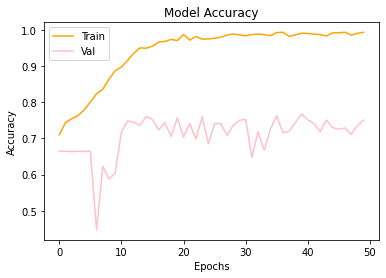

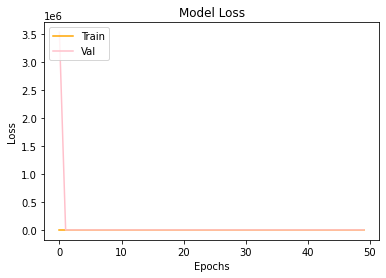

In [ ]:
plt.plot(history.history['accuracy'],color='orange')
plt.plot(history.history['val_accuracy'],color='pink')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'],color='orange')
plt.plot(history.history['val_loss'],color='pink')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_11 (Dense)            (None, 128)               2359424   
                                                                 
 dense_12 (Dense)            (None, 7)                 903       
                                                                 
Total params: 25,948,039
Trainable params: 25,894,919
Non-trainable params: 53,120
_________________________________________________________________


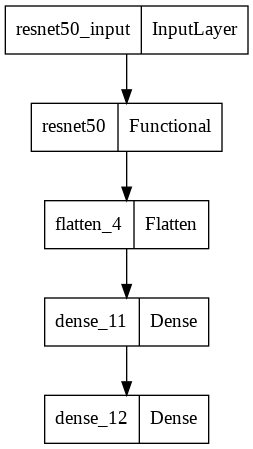

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

EFFICIENT NET - B5



In [ ]:
!pip install keras_efficientnets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.5 MB/s eta 0:00:00


In [ ]:
import keras_applications
from keras_efficientnets import EfficientNetB5
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(75,75,3),classes=y_train.shape[1])

In [ ]:
def build_cnn_model(input_shape = (75,75, 3), num_classes=2):
    model = Sequential()
    model.add(base_model)


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(7, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 18, 18, 64)       

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/20
109/110 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.6656

110/110 [==============================] - 5s 37ms/step - loss: 0.2523 - accuracy: 0.6659 - val_loss: 0.2576 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 2/20
110/110 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.6777

110/110 [==============================] - 4s 36ms/step - loss: 0.2174 - accuracy: 0.6777 - val_loss: 0.2233 - val_accuracy: 0.6855 - lr: 0.0010
Epoch 3/20
109/110 [============================>.] - ETA: 0s - loss: 0.2055 - accuracy: 0.6856

110/110 [==============================] - 3s 30ms/step - loss: 0.2052 - accuracy: 0.6863 - val_loss: 0.2085 - val_accuracy: 0.6819 - lr: 0.0010
Epoch 4/20
109/110 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.6957

110/110 [==============================] - 3s 30ms/step - loss: 0.1996 - accuracy: 0.6959 - val_loss: 0.1974 - val_accuracy: 0.6965 - lr: 0.0010
Epoch 5/20
109/110 [============================>.] - ETA: 0s - loss: 0.1869 - accuracy: 0.7107

110/110 [==============================] - 4s 33ms/step - loss: 0.1865 - accuracy: 0.7116 - val_loss: 0.1882 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 6/20
110/110 [==============================] - ETA: 0s - loss: 0.1768 - accuracy: 0.7262

110/110 [==============================] - 4s 38ms/step - loss: 0.1768 - accuracy: 0.7262 - val_loss: 0.1898 - val_accuracy: 0.7062 - lr: 0.0010
Epoch 7/20
108/110 [============================>.] - ETA: 0s - loss: 0.1676 - accuracy: 0.7462

110/110 [==============================] - 4s 33ms/step - loss: 0.1679 - accuracy: 0.7455 - val_loss: 0.1762 - val_accuracy: 0.7281 - lr: 0.0010
Epoch 8/20
109/110 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.7480

110/110 [==============================] - 3s 24ms/step - loss: 0.1648 - accuracy: 0.7479 - val_loss: 0.1824 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 9/20
109/110 [============================>.] - ETA: 0s - loss: 0.1616 - accuracy: 0.7536

110/110 [==============================] - 3s 28ms/step - loss: 0.1616 - accuracy: 0.7534 - val_loss: 0.1733 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 10/20
108/110 [============================>.] - ETA: 0s - loss: 0.1554 - accuracy: 0.7652

110/110 [==============================] - 3s 25ms/step - loss: 0.1554 - accuracy: 0.7648 - val_loss: 0.1728 - val_accuracy: 0.7361 - lr: 0.0010
Epoch 11/20
109/110 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.7737

110/110 [==============================] - 3s 24ms/step - loss: 0.1507 - accuracy: 0.7733 - val_loss: 0.1727 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 12/20
109/110 [============================>.] - ETA: 0s - loss: 0.1456 - accuracy: 0.7804

110/110 [==============================] - 3s 24ms/step - loss: 0.1454 - accuracy: 0.7807 - val_loss: 0.1752 - val_accuracy: 0.7261 - lr: 0.0010
Epoch 13/20
109/110 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.7920

110/110 [==============================] - 3s 27ms/step - loss: 0.1406 - accuracy: 0.7917 - val_loss: 0.1723 - val_accuracy: 0.7321 - lr: 0.0010
Epoch 14/20
110/110 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.7970

110/110 [==============================] - 3s 25ms/step - loss: 0.1326 - accuracy: 0.7970 - val_loss: 0.1742 - val_accuracy: 0.7378 - lr: 0.0010
Epoch 15/20
109/110 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.8032

110/110 [==============================] - 3s 25ms/step - loss: 0.1322 - accuracy: 0.8037 - val_loss: 0.1721 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 16/20
109/110 [============================>.] - ETA: 0s - loss: 0.1243 - accuracy: 0.8161

110/110 [==============================] - 3s 24ms/step - loss: 0.1242 - accuracy: 0.8163 - val_loss: 0.1718 - val_accuracy: 0.7441 - lr: 0.0010
Epoch 17/20
108/110 [============================>.] - ETA: 0s - loss: 0.1172 - accuracy: 0.8304

110/110 [==============================] - 3s 24ms/step - loss: 0.1167 - accuracy: 0.8315 - val_loss: 0.1801 - val_accuracy: 0.7411 - lr: 0.0010
Epoch 18/20
109/110 [============================>.] - ETA: 0s - loss: 0.1157 - accuracy: 0.8286

110/110 [==============================] - 3s 26ms/step - loss: 0.1156 - accuracy: 0.8285 - val_loss: 0.1771 - val_accuracy: 0.7424 - lr: 0.0010
Epoch 19/20
108/110 [============================>.] - ETA: 0s - loss: 0.1076 - accuracy: 0.8464

110/110 [==============================] - 3s 25ms/step - loss: 0.1077 - accuracy: 0.8456 - val_loss: 0.1739 - val_accuracy: 0.7527 - lr: 0.0010
Epoch 20/20
108/110 [============================>.] - ETA: 0s - loss: 0.1033 - accuracy: 0.8537

110/110 [==============================] - 3s 24ms/step - loss: 0.1035 - accuracy: 0.8532 - val_loss: 0.1820 - val_accuracy: 0.7567 - lr: 0.0010


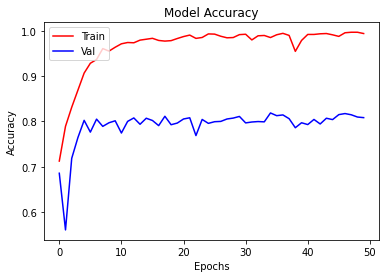

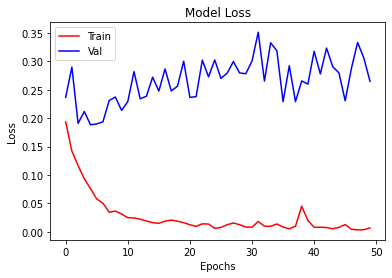

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 2048)        28513520  
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               2359424   
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 7)                 903       
                                                                 
Total params: 30,890,359
Trainable params: 30,717,623
Non-trainable params: 172,736
_________________________________________________________________


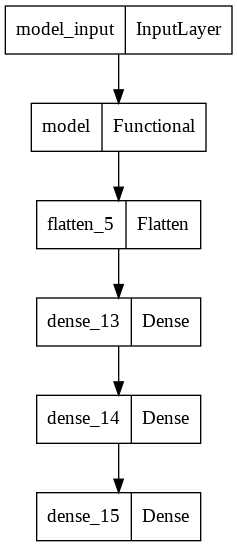

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

ACCURACY COMPARISION

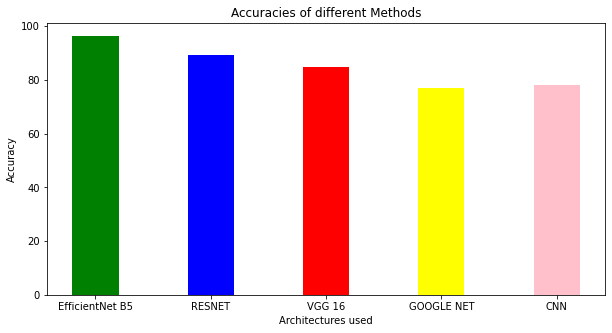

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'EfficientNet B5':96.32, 'RESNET': 89.39, 'VGG 16':84.86 ,'GOOGLE NET': 76.80, 'CNN':77.90}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color =['green','blue','red','yellow','pink'],
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods")
plt.show()

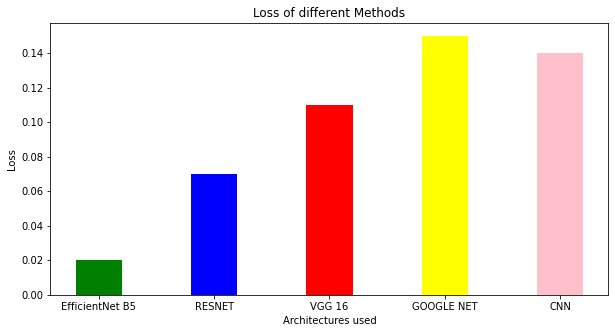

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'EfficientNet B5':0.02, 'RESNET': 0.07, 'VGG 16':0.11 ,'GOOGLE NET': 0.15, 'CNN':0.14}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color =['green','blue','red','yellow','pink'],
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Loss")
plt.title("Loss of different Methods")
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the pre-trained CNN model
model = model_cnn

# Define the image size
img_size = (75, 75)

# Get the input image from the user
img_path = input("image path:")

# Load the image and resize it to the defined size
img = image.load_img(img_path, target_size=img_size)

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Preprocess the image by scaling its pixel values between 0 and 1
img_array = img_array / 255.0

# Add a batch dimension to the image array
img_array = np.expand_dims(img_array, axis=0)

# Use the pre-trained model to make a prediction on the input image
pred = model.predict(img_array)

# Print the predicted class label and its probability
class_label = np.argmax(pred)
class_prob = np.max(pred)
print("The predicted class label is:", class_label)
print("The predicted class probability is:", class_prob)
